In [1]:
import pandas as pd

data =  pd.read_csv('data.csv')
data.dropna()
data.head()

,Manufacturer,Model,Version,Power(kW),Fuel_date,Consumption(kWh/100km),ECR_deviation,Fuel_type,Quantity(kWh),Tire_Type,City,Highway,Country_Roads\t,Driving_Style,A/C,Park_heating,Avg_Speed(km/h),Trip_Distance(km)
0,Volkswagen,Golf,e-Golf,85,08.02.2019,17.8,1.0,Electricity,13.00,Winter tires,0,0,1,Normal,0,1,53.0,80.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,15.5,-1.3,Electricity,12.29,Winter tires,0,0,1,Normal,0,1,47.0,50.0
2,Volkswagen,Golf,e-Golf,85,05.02.2019,18.0,1.2,Electricity,8.68,Winter tires,0,1,1,Normal,0,1,58.0,43.0
3,Volkswagen,Golf,e-Golf,85,04.02.2019,16.1,-0.7,Electricity,1.50,Winter tires,0,1,1,Normal,0,1,43.0,44.0
4,Volkswagen,Golf,e-Golf,85,04.02.2019,19.0,2.2,Electricity,14.44,Winter tires,0,1,0,Normal,0,1,76.0,76.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            3345 non-null   object 
 1   Model                   3345 non-null   object 
 2   Version                 3345 non-null   object 
 3   Power(kW)               3345 non-null   int64  
 4   Fuel_date               3345 non-null   object 
 5   Consumption(kWh/100km)  3345 non-null   float64
 6   ECR_deviation           3345 non-null   float64
 7   Fuel_type               3345 non-null   object 
 8   Quantity(kWh)           3345 non-null   float64
 9   Tire_Type               3345 non-null   object 
 10  City                    3345 non-null   int64  
 11  Highway                 3345 non-null   int64  
 12  Country_Roads	          3345 non-null   int64  
 13  Driving_Style           3345 non-null   object 
 14  A/C                     3345 non-null   

In [3]:
data.drop(['Manufacturer','Power(kW)','Version','Fuel_date','ECR_deviation','Fuel_type','Consumption(kWh/100km)','Model'], axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Quantity(kWh)      3345 non-null   float64
 1   Tire_Type          3345 non-null   object 
 2   City               3345 non-null   int64  
 3   Highway            3345 non-null   int64  
 4   Country_Roads	     3345 non-null   int64  
 5   Driving_Style      3345 non-null   object 
 6   A/C                3345 non-null   int64  
 7   Park_heating       3345 non-null   int64  
 8   Avg_Speed(km/h)    3332 non-null   float64
 9   Trip_Distance(km)  3344 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 261.5+ KB


# Removing all rows with missing values for Trip_Distance(km)
All the rows/ records with missing values of Trip_Distance(km) should be removed. These values cannot be imputed, because this is the target variable.

In [5]:
data = data[data['Trip_Distance(km)'].isnull() == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 0 to 3344
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Quantity(kWh)      3344 non-null   float64
 1   Tire_Type          3344 non-null   object 
 2   City               3344 non-null   int64  
 3   Highway            3344 non-null   int64  
 4   Country_Roads	     3344 non-null   int64  
 5   Driving_Style      3344 non-null   object 
 6   A/C                3344 non-null   int64  
 7   Park_heating       3344 non-null   int64  
 8   Avg_Speed(km/h)    3332 non-null   float64
 9   Trip_Distance(km)  3344 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 287.4+ KB


# Converting Trip Distance data tyoe from object to int 

In [6]:
data["Trip_Distance(km)"] = data["Trip_Distance(km)"].astype(float, errors = 'raise')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 0 to 3344
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Quantity(kWh)      3344 non-null   float64
 1   Tire_Type          3344 non-null   object 
 2   City               3344 non-null   int64  
 3   Highway            3344 non-null   int64  
 4   Country_Roads	     3344 non-null   int64  
 5   Driving_Style      3344 non-null   object 
 6   A/C                3344 non-null   int64  
 7   Park_heating       3344 non-null   int64  
 8   Avg_Speed(km/h)    3332 non-null   float64
 9   Trip_Distance(km)  3344 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 287.4+ KB


# One-Hot Encoding the categorical variables (Types of tires and driving styles)
The categorical variables cannot be used in the dataset for training the model. They have to be converted into a an integer representation of boolean form, i.e. 1/0

In [8]:
data.select_dtypes('object')

,Tire_Type,Driving_Style
0,Winter tires,Normal
1,Winter tires,Normal
2,Winter tires,Normal
3,Winter tires,Normal
4,Winter tires,Normal
...,...,...
3340,Winter tires,Normal
3341,Winter tires,Normal
3342,Winter tires,Normal
3343,Winter tires,Fast


In [9]:
print('Unique tire types:', data['Tire_Type'].unique())
print('Unique driving styles:', data['Driving_Style'].unique())

Unique tire types: ['Winter tires' 'Summer tires']
Unique driving styles: ['Normal' 'Fast' 'Moderate']


# Encoding types of tires

In [10]:
for each in data['Tire_Type'].unique():
    data['Tire_Type '+each] = list(map(int, data['Tire_Type']==each))

data.drop(['Tire_Type'], axis=1, inplace=True)
data.head()


,Quantity(kWh),City,Highway,Country_Roads\t,Driving_Style,A/C,Park_heating,Avg_Speed(km/h),Trip_Distance(km),Tire_Type Winter tires,Tire_Type Summer tires
0,13.00,0,0,1,Normal,0,1,53.0,80.0,1,0
1,12.29,0,0,1,Normal,0,1,47.0,50.0,1,0
2,8.68,0,1,1,Normal,0,1,58.0,43.0,1,0
3,1.50,0,1,1,Normal,0,1,43.0,44.0,1,0
4,14.44,0,1,0,Normal,0,1,76.0,76.0,1,0


# Encoding types of driving styles

In [11]:
for each in data['Driving_Style'].unique():
    data['Driving_Style '+each] = list(map(int, data['Driving_Style']==each))

data.drop(['Driving_Style'], axis=1, inplace=True)
data.head()

,Quantity(kWh),City,Highway,Country_Roads\t,A/C,Park_heating,Avg_Speed(km/h),Trip_Distance(km),Tire_Type Winter tires,Tire_Type Summer tires,Driving_Style Normal,Driving_Style Fast,Driving_Style Moderate
0,13.00,0,0,1,0,1,53.0,80.0,1,0,1,0,0
1,12.29,0,0,1,0,1,47.0,50.0,1,0,1,0,0
2,8.68,0,1,1,0,1,58.0,43.0,1,0,1,0,0
3,1.50,0,1,1,0,1,43.0,44.0,1,0,1,0,0
4,14.44,0,1,0,0,1,76.0,76.0,1,0,1,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 0 to 3344
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Quantity(kWh)           3344 non-null   float64
 1   City                    3344 non-null   int64  
 2   Highway                 3344 non-null   int64  
 3   Country_Roads	          3344 non-null   int64  
 4   A/C                     3344 non-null   int64  
 5   Park_heating            3344 non-null   int64  
 6   Avg_Speed(km/h)         3332 non-null   float64
 7   Trip_Distance(km)       3344 non-null   float64
 8   Tire_Type Winter tires  3344 non-null   int64  
 9   Tire_Type Summer tires  3344 non-null   int64  
 10  Driving_Style Normal    3344 non-null   int64  
 11  Driving_Style Fast      3344 non-null   int64  
 12  Driving_Style Moderate  3344 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 365.8 KB


# Shuffling and splitting the data it into training and test sets
Dividing the dataset into features (X) and label (Y)

In [13]:
data = data.sample(frac=1)

Y = data['Trip_Distance(km)']
X = data.drop(['Trip_Distance(km)'], axis=1)

X.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y.reset_index(level=None, drop=True, inplace=True)

# Dividing the features into training (80%) and testing (20%) datasets for model training and evaluation respectively

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

X_train.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train.reset_index(level=None, drop=True, inplace=True)
Y_test.reset_index(level=None, drop=True, inplace=True)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2675, 12) (2675,) (669, 12) (669,)


# Looking for columns with missing values in training set
Missing values for numerical/ non-categorical features is to be imputed using the rest of the data in the same feature.

In [15]:
X_train.isnull().any()


Quantity(kWh)             False
City                      False
Highway                   False
Country_Roads\t           False
A/C                       False
Park_heating              False
Avg_Speed(km/h)            True
Tire_Type Winter tires    False
Tire_Type Summer tires    False
Driving_Style Normal      False
Driving_Style Fast        False
Driving_Style Moderate    False
dtype: bool

# Imputing the missing values
Here, we have used a simple imputer using the 'mean strategy', i.e. the missing values will be replaced by the mean of non-missing values in that feature.

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

cols_with_missing_data = [cols for cols in X_train.columns
                         if X_train[cols].isnull().any()]

X_train_imputed_data_columns = pd.DataFrame(imputer.fit_transform(X_train[cols_with_missing_data]))
X_test_imputed_data_columns = pd.DataFrame(imputer.transform(X_test[cols_with_missing_data]))

X_train_imputed_data_columns.columns = cols_with_missing_data
X_test_imputed_data_columns.columns = cols_with_missing_data

X_train = pd.concat([X_train.drop(cols_with_missing_data, axis=1, inplace=False), X_train_imputed_data_columns], axis=1)
X_test = pd.concat([X_test.drop(cols_with_missing_data, axis=1, inplace=False), X_test_imputed_data_columns], axis=1)

# Checking the number of non-null values in each column of the dataset

In [17]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Quantity(kWh)           2675 non-null   float64
 1   City                    2675 non-null   int64  
 2   Highway                 2675 non-null   int64  
 3   Country_Roads	          2675 non-null   int64  
 4   A/C                     2675 non-null   int64  
 5   Park_heating            2675 non-null   int64  
 6   Tire_Type Winter tires  2675 non-null   int64  
 7   Tire_Type Summer tires  2675 non-null   int64  
 8   Driving_Style Normal    2675 non-null   int64  
 9   Driving_Style Fast      2675 non-null   int64  
 10  Driving_Style Moderate  2675 non-null   int64  
 11  Avg_Speed(km/h)         2675 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 250.9 KB


In [18]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Quantity(kWh)           669 non-null    float64
 1   City                    669 non-null    int64  
 2   Highway                 669 non-null    int64  
 3   Country_Roads	          669 non-null    int64  
 4   A/C                     669 non-null    int64  
 5   Park_heating            669 non-null    int64  
 6   Tire_Type Winter tires  669 non-null    int64  
 7   Tire_Type Summer tires  669 non-null    int64  
 8   Driving_Style Normal    669 non-null    int64  
 9   Driving_Style Fast      669 non-null    int64  
 10  Driving_Style Moderate  669 non-null    int64  
 11  Avg_Speed(km/h)         669 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 62.8 KB


# Outlier Analysis

#### This analysis is performed on continuos features assuming that they are having Gaussian distribution. The data points having a z-score of more than 3 and less than -3 are removed from the dataset since they are considered as outliers.

In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Outlier analysis is used for identifying outlying continuous data.
# In our dataset Quantity(kWh) & Avg_Speed(km/h) are the only continuos data apart from the target variable.

# For Average Speed (km/hr)

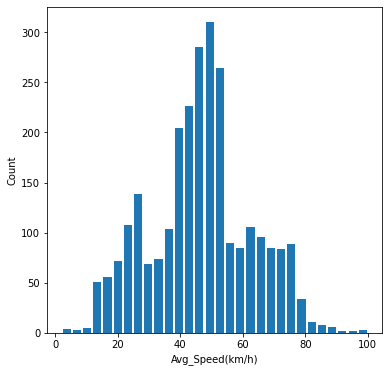

In [20]:

plt.figure(figsize=(6,6))
plt.hist(X_train['Avg_Speed(km/h)'], bins=30, rwidth=0.8)
plt.xlabel('Avg_Speed(km/h)')
plt.ylabel('Count')
plt.show()

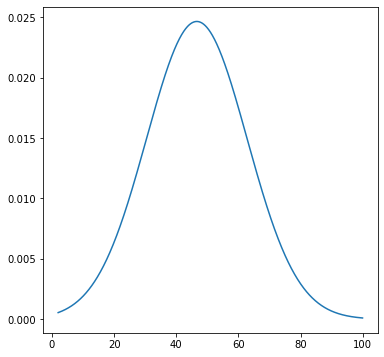

In [21]:
plt.figure(figsize=(6,6))
rng = np.arange(X_train['Avg_Speed(km/h)'].min(), X_train['Avg_Speed(km/h)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, X_train['Avg_Speed(km/h)'].mean(), X_train['Avg_Speed(km/h)'].std()))
plt.show()

In [22]:
# It could be cleary seen from the bell shaped curve that the data for average speed is normalized
# Thus removing outliers depending upon the z-score

X_train['Speed_z_score'] = (X_train['Avg_Speed(km/h)'] - X_train['Avg_Speed(km/h)'].mean())/X_train['Avg_Speed(km/h)'].std()
X_test['Speed_z_score'] = (X_test['Avg_Speed(km/h)'] - X_test['Avg_Speed(km/h)'].mean())/X_test['Avg_Speed(km/h)'].std()

# Reomving inputes with z-score of more than 3 or less than -3 for average speed
to_be_included_train = (X_train['Speed_z_score']<3) | (X_train['Speed_z_score']>-3)
to_be_included_test = (X_test['Speed_z_score']<3) | (X_test['Speed_z_score']>-3)

X_train = X_train[to_be_included_train]
Y_train = Y_train[to_be_included_train]

X_test = X_test[to_be_included_test]
Y_test = Y_test[to_be_included_test]

X_train.drop(['Speed_z_score'], axis=1, inplace=True)
X_test.drop(['Speed_z_score'], axis=1, inplace=True)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2675, 12) (2675,) (669, 12) (669,)


# For Quantity(kWh)

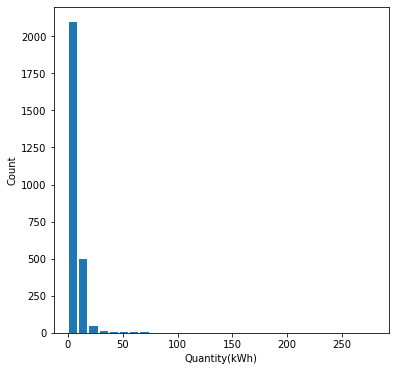

In [23]:
plt.figure(figsize=(6,6))
plt.hist(X_train['Quantity(kWh)'], bins=30, rwidth=0.8)
plt.xlabel('Quantity(kWh)')
plt.ylabel('Count')
plt.show()

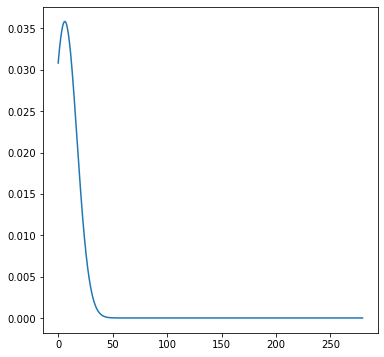

In [24]:
plt.figure(figsize=(6,6))
rng = np.arange(X_train['Quantity(kWh)'].min(), X_train['Quantity(kWh)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, X_train['Quantity(kWh)'].mean(), X_train['Quantity(kWh)'].std()))
plt.show()

In [25]:
# From the curve it is concluded that the Quantity(kWh) is not distributed normally
# Hence, removing all the rows with Quantity(kWh) greater than 65kWh

to_be_included_train = X_train['Quantity(kWh)']<=65
to_be_included_test = X_test['Quantity(kWh)']<=65

X_train = X_train[to_be_included_train]
Y_train = Y_train[to_be_included_train]

X_test = X_test[to_be_included_test]
Y_test = Y_test[to_be_included_test]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train.reset_index(level=None, drop=True, inplace=True)
Y_test.reset_index(level=None, drop=True, inplace=True)

(2666, 12) (2666,) (667, 12) (667,)


# Correlation between different features

C:\Users\SUTF-LAB-2\.conda\envs\gpu\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\SUTF-LAB-2\.conda\envs\gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


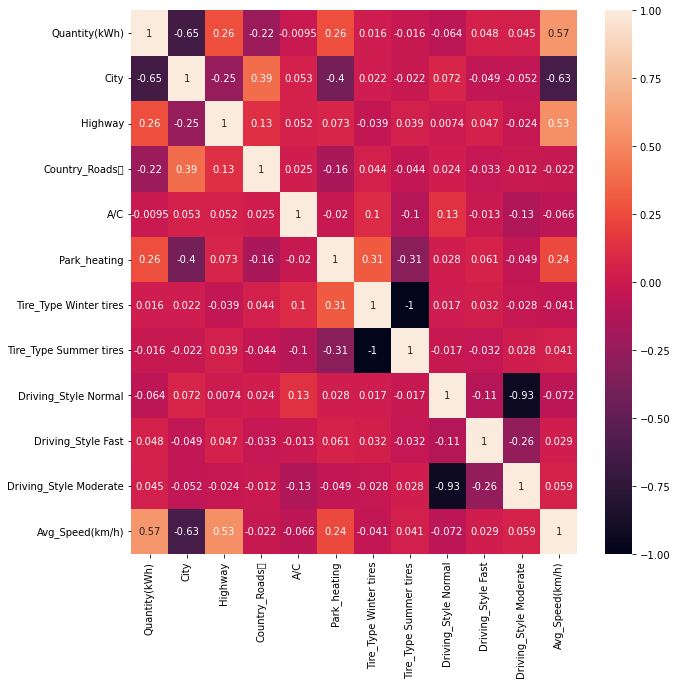

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(method='pearson'), annot=True)
plt.show()

##### As it could be seen from the heatmap that the Driving_Style Normal & Driving_Style Moderate are possessing strong negative correlation, one of them needs to be dropped. Same goes for Summer & winter tire types.

In [27]:
X_train = X_train.drop(['Driving_Style Normal', 'Tire_Type Summer tires'], axis=1)
X_test = X_test.drop(['Driving_Style Normal', 'Tire_Type Summer tires'], axis=1)

# Tensorflow Model

# Preparing a neural network model in tensorflow for this regression problem.

Importing the necessary libraries

In [28]:
import tensorflow as tf
#import tensorflowjs
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import regularizers

##### Normalizing the continuos features before feeding it to the neural net

In [29]:
cols_to_be_normalized = ['Quantity(kWh)', 'Avg_Speed(km/h)']

for each in cols_to_be_normalized:
    mean = X_train[each].mean()
    std = X_train[each].std()

    X_train[each] = (X_train[each] - mean)/std
    X_test[each] = (X_test[each] - mean)/std

In [30]:
X_train

,Quantity(kWh),City,Highway,Country_Roads\t,A/C,Park_heating,Tire_Type Winter tires,Driving_Style Fast,Driving_Style Moderate,Avg_Speed(km/h)
0,-0.879248,1,0,0,0,0,0,0,1,-2.013272
1,0.713213,0,1,0,0,0,0,0,1,0.400291
2,1.411995,0,0,1,0,1,1,0,1,2.009334
3,-0.597200,1,0,0,0,0,1,0,1,-1.580068
4,0.485040,0,1,0,0,0,0,0,1,0.957268
...,...,...,...,...,...,...,...,...,...,...
2661,-0.614630,1,1,1,0,0,1,0,1,0.338405
2662,-0.627306,0,0,1,0,1,1,0,1,1.019154
2663,-0.386456,1,0,1,0,0,0,0,0,-0.404230
2664,-0.492620,1,1,1,0,0,0,0,1,-0.280457


In [31]:
X_test

,Quantity(kWh),City,Highway,Country_Roads\t,A/C,Park_heating,Tire_Type Winter tires,Driving_Style Fast,Driving_Style Moderate,Avg_Speed(km/h)
0,-0.285046,1,1,1,0,0,1,0,1,-0.342344
1,-0.519557,1,0,1,0,0,1,0,1,-1.084978
2,0.618141,0,1,0,0,1,0,0,1,1.204813
3,-0.709702,1,1,0,0,1,1,0,1,-1.703841
4,-0.662166,1,0,1,0,0,0,0,1,0.338405
...,...,...,...,...,...,...,...,...,...,...
662,-0.820620,1,0,0,0,0,1,0,1,-1.146865
663,-0.709702,1,1,1,0,0,0,0,1,0.090860
664,1.076073,0,1,0,0,1,0,0,0,1.081040
665,-0.758823,1,0,0,0,0,0,0,1,-1.456296


#### Bulding a sequential model

In [32]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear')) 

batch_size = 16     # batch size for model fitting

epochs = 1000       # number of epochs for model fitting

STEPS_PER_EPOCH = X_train.shape[0]/batch_size

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0) # Early stopping to prevent overfitting
 
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(                  # Using a dynamic learning rate that decays a certain rate per 100 epochs
  0.001,
  decay_steps=STEPS_PER_EPOCH*100,
  decay_rate=0.98,
  staircase=False)        

opt = keras.optimizers.RMSprop(lr_schedule)   # Using RMSprop optimizer with the learning rate schedule as mentioned above

model.compile(loss='mae', optimizer=opt, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


# Fitting the model to the training data


In [33]:
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], validation_split=0.2, validation_data=None, verbose=1)


Epoch 1/1000
134/134 [==============================] - 0s 1ms/step - loss: 35.0918 - mae: 35.0918 - val_loss: 23.8594 - val_mae: 23.8594
Epoch 2/1000
134/134 [==============================] - 0s 422us/step - loss: 23.1159 - mae: 23.1159 - val_loss: 17.4149 - val_mae: 17.4149
Epoch 3/1000
134/134 [==============================] - 0s 418us/step - loss: 16.7358 - mae: 16.7358 - val_loss: 13.7288 - val_mae: 13.7288
Epoch 4/1000
134/134 [==============================] - 0s 402us/step - loss: 13.6108 - mae: 13.6108 - val_loss: 12.6345 - val_mae: 12.6345
Epoch 5/1000
134/134 [==============================] - 0s 410us/step - loss: 12.4364 - mae: 12.4364 - val_loss: 11.8401 - val_mae: 11.8401
Epoch 6/1000
134/134 [==============================] - 0s 410us/step - loss: 11.4911 - mae: 11.4911 - val_loss: 11.2987 - val_mae: 11.2987
Epoch 7/1000
134/134 [==============================] - 0s 409us/step - loss: 10.7061 - mae: 10.7061 - val_loss: 10.9649 - val_mae: 10.9649
Epoch 8/1000
134/134 [

# Making predictions for the test dataset and evaluating the model on the basis of mean absolute error


In [34]:
from sklearn.metrics import mean_absolute_error
predictions = (model.predict(X_test))
print(mean_absolute_error(Y_test, predictions))

6.9469081794304115


In [35]:
compare = pd.concat([pd.DataFrame(predictions), pd.DataFrame(Y_test)], axis=1)
compare.columns = ['Predictions', 'Actual Output']
compare

,Predictions,Actual Output
0,20.434772,20.0
1,22.585392,27.0
2,86.463997,72.0
3,8.203522,1.0
4,21.281868,21.0
...,...,...
662,3.843548,4.0
663,19.406723,19.0
664,81.448235,34.0
665,6.747513,6.0


# Calculating the standard deviation of the test labels

In [36]:
Y_test.std()

48.260065933170004

# As per the research paper (https://sci-hub.se/10.1109/ICSPIS48872.2019.9066042), a model having a MAE of less than 10% of standard deviation of the label (for regression), i.e. 4.384 km in our case, is considered as an excellent model. the MAE of our model for test data is 3.18 (approximately). Hence, it can considered as a reliable model.

##### Saving and exporting JSON version of the model

In [37]:
import tensorflowjs

model.save('path/to/save/model')
tensorflowjs.converters.save_keras_model(model,' path/to/save/Model (Final)/JSON')